Objective
- Relax Inc. makes productivity and project management software that's popular with both individuals and teams. Founded by several former Facebook employees, it's considered a great company to work for.

- Defining  an  "adopted  user" as a user  who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven-day  period, identify  which  factors  predict  future  useradoption.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
users = pd.read_csv('takehome_users.csv')
pd.options.display.float_format = '{:.2f}'.format

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810.00,1,0,11,10803.00
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504.00,0,0,1,316.00
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892.00,0,0,94,1525.00
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168.00,0,0,1,5151.00
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660.00,0,0,193,5240.00


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


1]  A  user  table  ( "takehome_users" )  with  data  on  12,000  users  who  signed  up  for  the
product  in  the  last  two  years.   This  table  includes:
- name:  the  user's  name
- object_id:   the  user's  id
- email:  email  address
- creation_source:   how  their  account  was  created.  This  takes  on  one of  5  values:
        ○ PERSONAL_PROJECTS:  invited  to  join  another  user's personal  workspace
        ○ GUEST_INVITE:  invited  to  an  organization  as  a  gues (limited  permissions)
        ○ ORG_INVITE:  invited  to  an  organization  (as  a  full  member)
        ○ SIGNUP:  signed  up  via  the  website
        ○ SIGNUP_GOOGLE_AUTH:  signed  up  using  Google Authentication  (using  a  Google  email  account  for  their  login id)
- creation_time:  when  they  created  their  account
- last_session_creation_time:   unix  timestamp  of  last  login
- opted_in_to_mailing_list:  whether  they  have  opted  into  receiving marketing  emails
- enabled_for_marketing_drip:  whether  they  are  on  the  regular marketing  email  drip
- org_id:   the  organization  (group  of  users)  they  belong  to
- invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).


In [5]:
user_engagement = pd.read_csv('takehome_user_engagement.csv')

In [6]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


# Defining adopted users

In [8]:
# How many values does 'visited' take?
sorted(list(user_engagement['visited'].unique()))

[1]

In [9]:
# Count how many unique users in our engagment data of the 207,917 entries 
print('There are {} unique users of the 207,917 entries in engagement data'\
      .format(len(user_engagement['user_id'].unique())))

There are 8823 unique users of the 207,917 entries in engagement data


In [14]:
from datetime import datetime
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'], 
 format = '%Y-%m-%d', 
 errors = 'coerce')

In [15]:
user_engagement['time_stamp'] = user_engagement['time_stamp'].dt.floor('d').astype(np.int64)

In [16]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   time_stamp  207917 non-null  int64
 1   user_id     207917 non-null  int64
 2   visited     207917 non-null  int64
dtypes: int64(3)
memory usage: 4.8 MB


In [17]:
user_engagement.head()

,time_stamp,user_id,visited
0,1398124800000000000,1,1
1,1384473600000000000,2,1
2,1385683200000000000,2,1
3,1386547200000000000,2,1
4,1387929600000000000,2,1


In [19]:
#sorting and remove duplicated days per users 
user_engagement = user_engagement.sort_values(['user_id', 'time_stamp']).drop_duplicates()

In [20]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   time_stamp  207917 non-null  int64
 1   user_id     207917 non-null  int64
 2   visited     207917 non-null  int64
dtypes: int64(3)
memory usage: 6.3 MB


In [21]:
a = user_engagement.groupby('user_id')['time_stamp'].rolling(window=3)
b = pd.to_timedelta((a.max()- a.min())).dt.days
print (b)

user_id        
1        0          NaN
2        1          NaN
         2          NaN
         3        24.00
         4        26.00
                   ... 
11996    207912     NaN
11997    207913     NaN
11998    207914     NaN
11999    207915     NaN
12000    207916     NaN
Name: time_stamp, Length: 207917, dtype: float64


In [45]:
c = b[b <= 7].index.get_level_values('user_id').tolist()

In [46]:
c = set(c)

In [44]:
len(c)

1656

In [54]:
users2 = pd.DataFrame(c, columns = ['object_id'])

In [55]:
users2 ['adopted_users'] = int(1)

In [56]:
users2.head()

,object_id,adopted_users
0,8192,1
1,2,1
2,8196,1
3,8201,1
4,10,1


In [57]:
users2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   object_id      1656 non-null   int64
 1   adopted_users  1656 non-null   int64
dtypes: int64(2)
memory usage: 26.0 KB


In [58]:
users2 = users2.sort_values('object_id')

In [59]:
users2

,object_id,adopted_users
1,2,1
4,10,1
5,20,1
10,33,1
13,42,1
...,...,...
1063,11965,1
1064,11967,1
1065,11969,1
1066,11975,1


In [61]:
df3 = users.merge(users2, how='left')

In [62]:
df3['adopted_users'] = df3['adopted_users'].fillna(value=0)

In [63]:
df3.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810.00,1,0,11,10803.00,0.00
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504.00,0,0,1,316.00,1.00
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892.00,0,0,94,1525.00,0.00
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168.00,0,0,1,5151.00,0.00
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660.00,0,0,193,5240.00,0.00


# Predictive Modeling

After defining our adopted users, we will now aim to identify which factors predict future users adoption using a classification machine learning model.

In [64]:
# We will first use one-hot encoding to transform our categorical features 
df3['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [65]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['ORG_INVITE','GUEST_INVITE','PERSONAL_PROJECTS','SIGNUP','SIGNUP_GOOGLE_AUTH'])

LabelEncoder()

In [67]:
creation = le.transform(df3['creation_source'])

In [68]:
df4 = pd.DataFrame(creation, columns = ['creation'])
df = pd.concat([df3 ,df4], axis=1)
df.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users,creation
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810.00,1,0,11,10803.00,0.00,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504.00,0,0,1,316.00,1.00,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892.00,0,0,94,1525.00,0.00,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168.00,0,0,1,5151.00,0.00,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660.00,0,0,193,5240.00,0.00,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1387424226.00,0,0,197,11241.00,0.00,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1356009872.00,0,1,37,NaN,0.00,3
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0.00,2
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0.00,2
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1401833283.00,1,1,318,4143.00,1.00,1


In [69]:
# Import Extreme Gradient Boosting Classification Model 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create axes for labels and features
y = df['adopted_users']
X = df[['creation','last_session_creation_time','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id']]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [70]:
from xgboost import XGBClassifier
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
X.columns

Index(['creation', 'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id'],
      dtype='object')

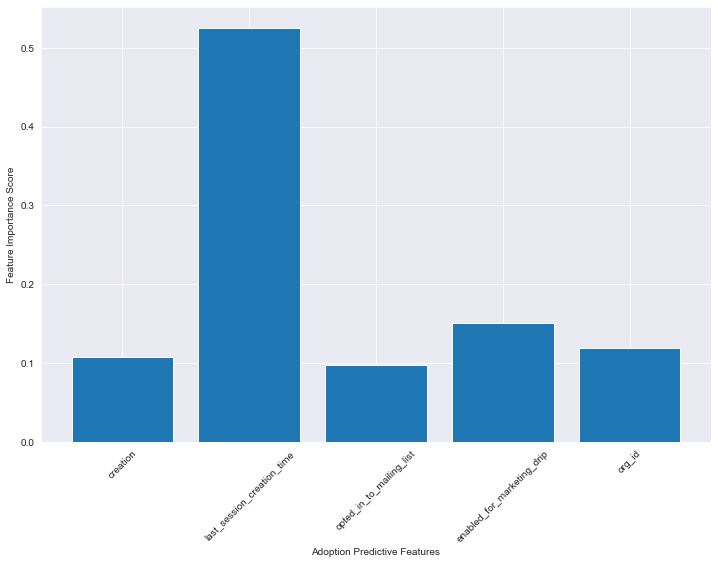

In [72]:
# Plot the feature importances for our target label of adopted users 
feat_imp = model.feature_importances_
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
xcol = X.columns
plt.xlabel('Adoption Predictive Features')
plt.ylabel('Feature Importance Score')
plt.xticks(range(len(xcol)), xcol.values, rotation=45)
plt.show()

In [73]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.01%


We see above that the XGBClassifier model does a good job in predicting whether a user will be an adopted user in the future and that the most important features to determine adoption are the last login times of a user.